## Task 3

## Problem statement
- For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically.
- The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Reading the dataset

In [2]:
dataset = pd.read_csv("Iris.csv")

## Exploring the Iris dataset

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
dataset.shape

(150, 6)

In [6]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# Checking for null values
dataset.isnull().sum()/len(dataset)*100

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

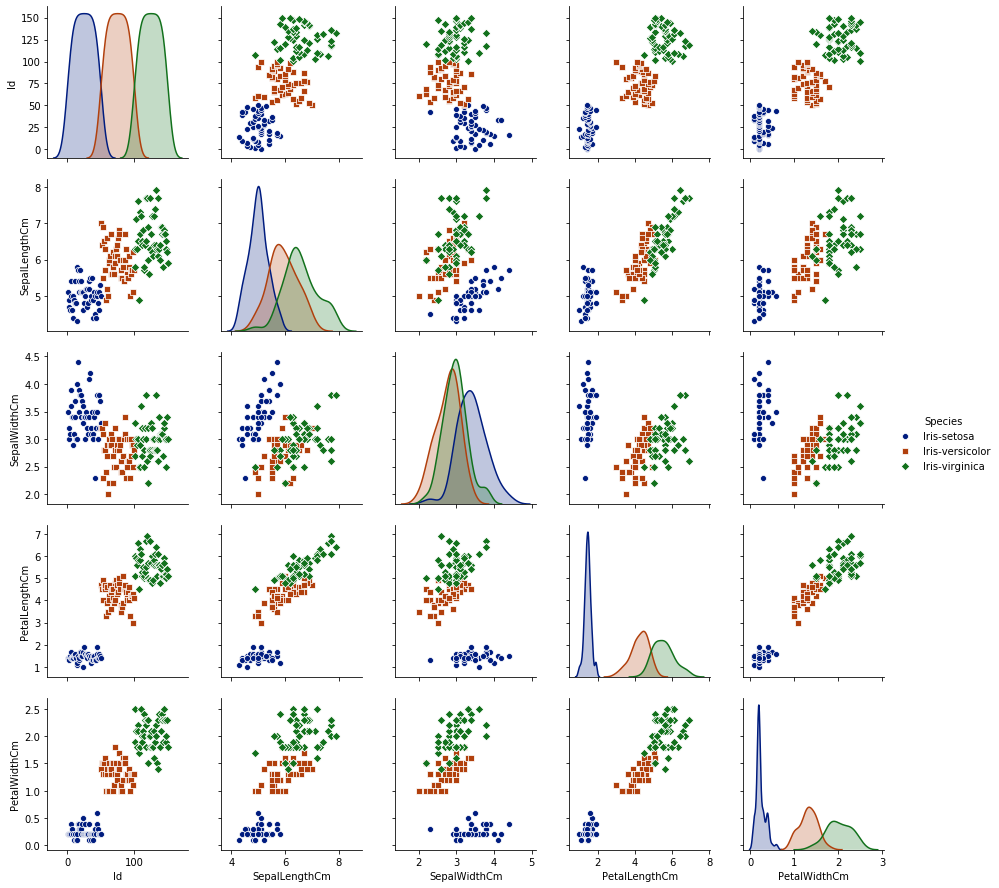

In [8]:
sns.pairplot(dataset,hue='Species',palette='dark', markers=['o','s','D'])

In [9]:
X=dataset.drop(['Id','Species'],axis = 1)
Y=dataset['Species']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

## Applying Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "entropy")
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
y_pred = clf.predict(x_test)

In [13]:
cm = confusion_matrix(y_test,y_pred)

In [14]:
print("Confusio Matrix:",cm,sep='\n')

Confusio Matrix:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [15]:
score=clf.score(x_test,y_test)

In [16]:
score

0.9777777777777777

In [17]:
cols=list(X.columns.values)
cols

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [18]:
from sklearn import tree

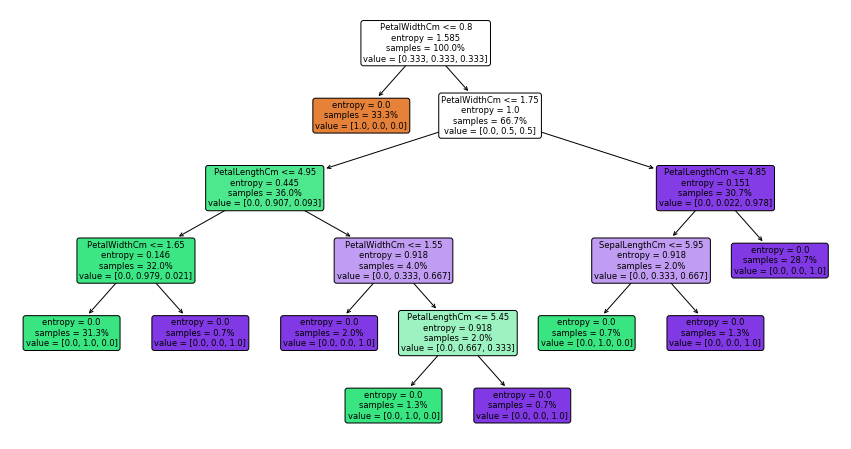

In [19]:
plt.figure(figsize=(15,8))
tree.plot_tree(clf.fit(X,Y),feature_names=cols,filled=True,precision=3,proportion=True,rounded=True)
plt.show()